In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import np_utils
import numpy as np
from numpy import dstack
from matplotlib import cm

# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

#ClassifiersP
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Warnings deactivate
import warnings
warnings.filterwarnings('ignore')

## Dataset Preparation

In [2]:
# Read and import data
df = pd.read_csv('Bank-data/bank-additional-full.csv', sep = ';')

# Explore the dataset
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


 Here's a summary of the information we've gathered about the dataset:

**Structure:**

- The dataset has 41,188 entries (rows) and 21 columns (features).
- The data types include integers `int64` for 5 columns, floating-point numbers `float64` for 5 columns, and text data `object` for 11 columns.
- There are no missing values in any of the columns, which simplifies data cleaning.

**Column Data Types:**

- Numerical Features:
   - `age` (int64)
   - `duration` (int64)
   - `campaign` (int64)
   - `pdays` (int64)
   - `previous` (int64)
   - `emp.var.rate` (float64)
   - `cons.price.idx` (float64)
   - `cons.conf.idx` (float64)
   - `euribor3m` (float64)
   - `nr.employed` (float64)

- Categorical Features:
   - `job` (object)
   - `marital` (object)
   - `education` (object)
   - `default` (object)
   - `housing` (object)
   - `loan` (object)
   - `contact` (object)
   - `month` (object)
   - `day_of_week` (object)
   - `poutcome` (object)
   - `y` (object, likely the target variable)


In [3]:
# Transform to categorical data
col_cat = list(df.select_dtypes(include=['object']).columns)
df.loc[:, col_cat] = df[col_cat].astype('category')

In [4]:
# Creating Separate DataFrames for Input Features (X) and Target Variable (y):
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
print(col_cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [6]:
# Encoding

# Remove target variable from enconding proccess
col_cat.pop()

# Encode categorical features
encoder = OrdinalEncoder()
encoder.fit(X[col_cat])

X_cat_enc = encoder.transform(X[col_cat])
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat

In [7]:
# Normalization

# Selecting Numerical Columns
col_num = list(df.select_dtypes(include =['int64', 'float64']).columns)

# Creating MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting and Transforming
X_num_enc = scaler.fit_transform(X[col_num])
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num

# Concatenate the encoded categorical features with the normalized numerical features
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)

In [8]:
# Encoding target variable
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)

# Set the column name of the Series to the original target variable name
y_enc.columns = y.name

In [9]:
# Remove correlated fields

# Create List of Columns
col = list(x_enc.columns)

# Remove Columns from List
col.remove('emp.var.rate')
col.remove('nr.employed')

# Filter DataFrame
x_enc = x_enc[col]

In [10]:
# Feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc,y_enc)

# Feature Scores Analysis
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_enc.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns

 # Create a new x_enc containing only the top 10 features identified by the chi-square test.
x_enc = x_enc[list(featureScores.nlargest(10,'Score')['Specs'])]

# Print Results
pd.options.display.float_format = '{:.2f}'.format
print(x_enc)
print(y_enc)

       euribor3m  contact  previous  duration  default  education  pdays  \
0           0.96     1.00      0.00      0.05     0.00       0.00   1.00   
1           0.96     1.00      0.00      0.03     1.00       3.00   1.00   
2           0.96     1.00      0.00      0.05     0.00       3.00   1.00   
3           0.96     1.00      0.00      0.03     0.00       1.00   1.00   
4           0.96     1.00      0.00      0.06     0.00       3.00   1.00   
...          ...      ...       ...       ...      ...        ...    ...   
41183       0.09     0.00      0.00      0.07     0.00       5.00   1.00   
41184       0.09     0.00      0.00      0.08     0.00       5.00   1.00   
41185       0.09     0.00      0.00      0.04     0.00       6.00   1.00   
41186       0.09     0.00      0.00      0.09     0.00       5.00   1.00   
41187       0.09     0.00      0.14      0.05     0.00       5.00   1.00   

       poutcome  job  cons.price.idx  
0          1.00 3.00            0.70  
1        

## Classification models

In [11]:
# Model Definitions
clf1 = LogisticRegression(random_state = 1)
clf2 = QuadraticDiscriminantAnalysis()
clf3 = GaussianNB()
clf4 = RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)
clf5 = AdaBoostClassifier()
clf6 = GradientBoostingClassifier()

# Cross-Validation Results (Empty list for now)
cv_results = []

# Cross-Validation Loop
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6], ['Logistic Regression', 'Quadratic Discriminant Analysis', 'Naive Bayes', 'Random Forest', 'Ada Boost', 'Gradient Boosting']):
    scores = cross_val_score(clf, x_enc, y_enc, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
    cv_results.append({
      'model_name': label,
      'accuracy': scores,
      'std_dev': scores.std()
      })

Accuracy: 0.87 (+/- 0.06) [Logistic Regression]
Accuracy: 0.83 (+/- 0.13) [Quadratic Discriminant Analysis]
Accuracy: 0.80 (+/- 0.15) [naive Bayes]
Accuracy: 0.79 (+/- 0.16) [Random Forest]
Accuracy: 0.61 (+/- 0.27) [Ada Boost]
Accuracy: 0.51 (+/- 0.31) [Gradient Boosting]


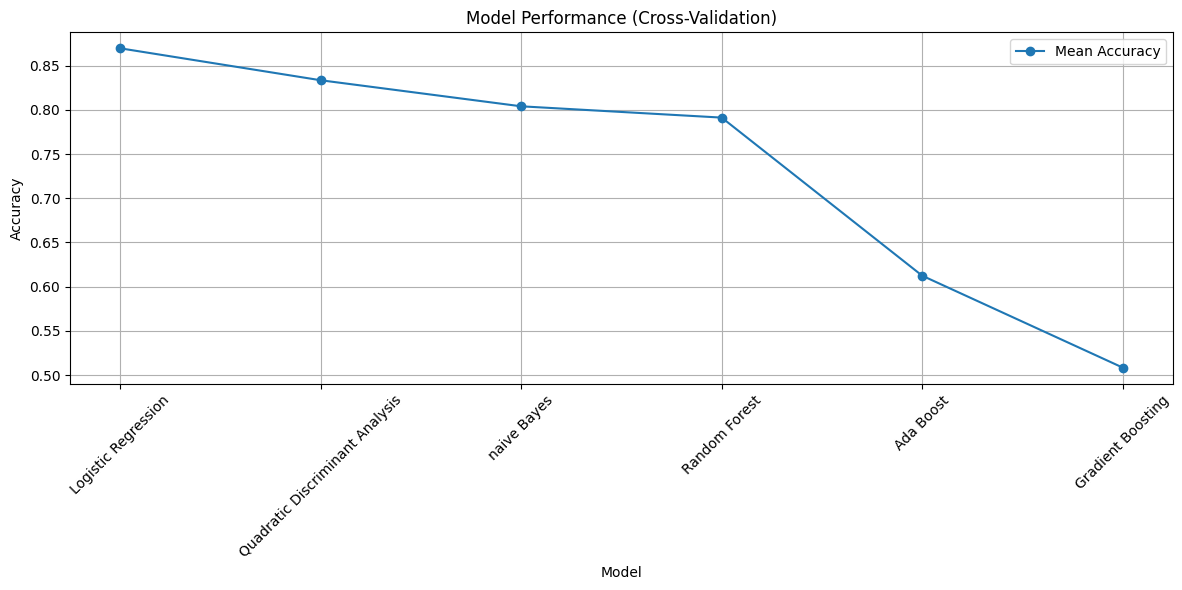

In [20]:
# Extract data for the plot (assuming you have cv_results)
models = [result['model_name'] for result in cv_results]
mean_accuracy = [np.mean(result['accuracy']) for result in cv_results]  # Average accuracy for each model
std_dev = [result['std_dev'] for result in cv_results]

# Create line plot with shaded area for standard deviation
plt.figure(figsize=(12, 6))

# Line for mean accuracy
plt.plot(models, mean_accuracy, marker = 'o', label = 'Mean Accuracy')

# Display the results
plt.title('Model Performance (Cross-Validation)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()